In [2]:
from torch.utils.data import Dataset 
from PIL import Image
import numpy as np
import os 
import torchvision.transforms as transforms

transforms = transforms.Compose([
    transforms.RandomCrop(size=(512, 512)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[123.675, 116.28, 103.53],
                          std=[58.395, 57.12, 57.375])
])

test_transform = transforms.Compose([
    transforms.Resize(width=512,height=512), 
    transforms.Normalize(mean=[123.675, 116.28, 103.53],
                          std=[58.395, 57.12, 57.375])
])

class LoveDA(Dataset):
    def __init__(self, imagePaths, maskPaths, transforms):
        self.imagePaths = imagePaths
        self.maskPaths = maskPaths 
        self.transforms = transforms 

        self.image_files=os.listdir("/media/data_16T/chloe/try/Train/Urban/images_png")
        self.mask_files = os.listdir("/media/data_16T/chloe/try/Train/Urban/masks_png")

    def __len__(self):
        return len(self.imagePaths)
    
    def __getitem__(self, idx):
        imagePath = os.path.join(self.image_dir, self.image_files[idx])
        maskPath = os.path.join(self.mask_dir, self.mask_files[idx])

        image = Image.open(imagePath).convert("RGB")
        mask = Image.open(maskPath).convert("L")

   
        if self.transforms:
            image = self.transforms(image)
            mask = self.transforms(mask)
        
        return (image, mask)

AttributeError: 'Compose' object has no attribute 'Compose'

In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git

In [6]:
!pip install -q datasets
from datasets import load_dataset

In [ ]:
from datasets import Dataset, concatenate_datasets, ImageFolder


ImportError: cannot import name 'ImageFolder' from 'datasets' (/home/chia/anaconda3/envs/py36/lib/python3.7/site-packages/datasets/__init__.py)

In [9]:
dataset = load_dataset("chloechia/correctloveda")
train_image = load_dataset("chloechia/correctloveda", split="train")
validation_image = load_dataset("chloechia/correctloveda", split="validation")

Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--correctloveda-48acb3a21023f5ec/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
100%|██████████| 2/2 [00:00<00:00, 115.38it/s]
Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--correctloveda-48acb3a21023f5ec/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--correctloveda-48acb3a21023f5ec/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


In [10]:
mask_dataset = load_dataset("chloechia/maskloveda")

Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--maskloveda-7a50fcee7fa19fe3/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
100%|██████████| 2/2 [00:00<00:00, 115.87it/s]


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1366
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 1669
    })
})

In [13]:
train_image = train_image.remove_columns("label")
validation_image = validation_image.remove_columns("label")
train_mask_dataset = load_dataset("chloechia/maskloveda", split="train")
train_mask_dataset = train_mask_dataset.remove_columns("label")
val_mask_dataset = load_dataset("chloechia/maskloveda", split="validation")
# val_mask_dataset = val_mask_dataset.remove_columns("label")

ValueError: Column name label not in the dataset. Current columns in the dataset: ['image']

In [33]:
val_mask_dataset = load_dataset("chloechia/maskloveda", split="validation")
val_mask_dataset = val_mask_dataset.remove_columns("label")
val_mask_dataset = val_mask_dataset.rename_column("image", "masks")

Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--maskloveda-7a50fcee7fa19fe3/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


In [34]:
train_mask_dataset, val_mask_dataset

(Dataset({
     features: ['masks'],
     num_rows: 1366
 }),
 Dataset({
     features: ['masks'],
     num_rows: 1669
 }))

In [17]:
from datasets import concatenate_datasets, load_dataset
val_mask_dataset = dataset.rename_column("image", "mask")
val_mask_dataset


DatasetDict({
    train: Dataset({
        features: ['mask', 'label'],
        num_rows: 1366
    })
    validation: Dataset({
        features: ['mask', 'label'],
        num_rows: 1669
    })
})

In [22]:
train_mask_dataset = train_mask_dataset.rename_column("image", "masks")


In [35]:
official_train = concatenate_datasets([train_image, train_mask_dataset], axis=1)
official_val = concatenate_datasets([validation_image, val_mask_dataset], axis=1)
official_val

Dataset({
    features: ['image', 'masks'],
    num_rows: 1669
})

In [36]:
official_train, official_val

(Dataset({
     features: ['image', 'masks'],
     num_rows: 1366
 }),
 Dataset({
     features: ['image', 'masks'],
     num_rows: 1669
 }))

In [6]:
# train_ds = load_dataset("imagefolder", data_dir="/media/data_16T/chloe/try/urban:rural train images")
train_ds = ds = load_dataset("chloechia/correctloveda", split="train")
mask_path = "/media/data_16T/chloe/urban:rural train masks"
new_train_ds = train_ds.remove_columns("label")
new_train_ds
train_ds.add_column("masks", mask_path)
        

Found cached dataset imagefolder (/home/chia/.cache/huggingface/datasets/chloechia___imagefolder/chloechia--correctloveda-48acb3a21023f5ec/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


ValueError: Failed to concatenate on axis=1 because tables don't have the same number of rows

# Done with making train and val sets

In [48]:
official_train[1]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 'masks': <PIL.PngImagePlugin.PngImageFile image mode=L size=1024x1024>}

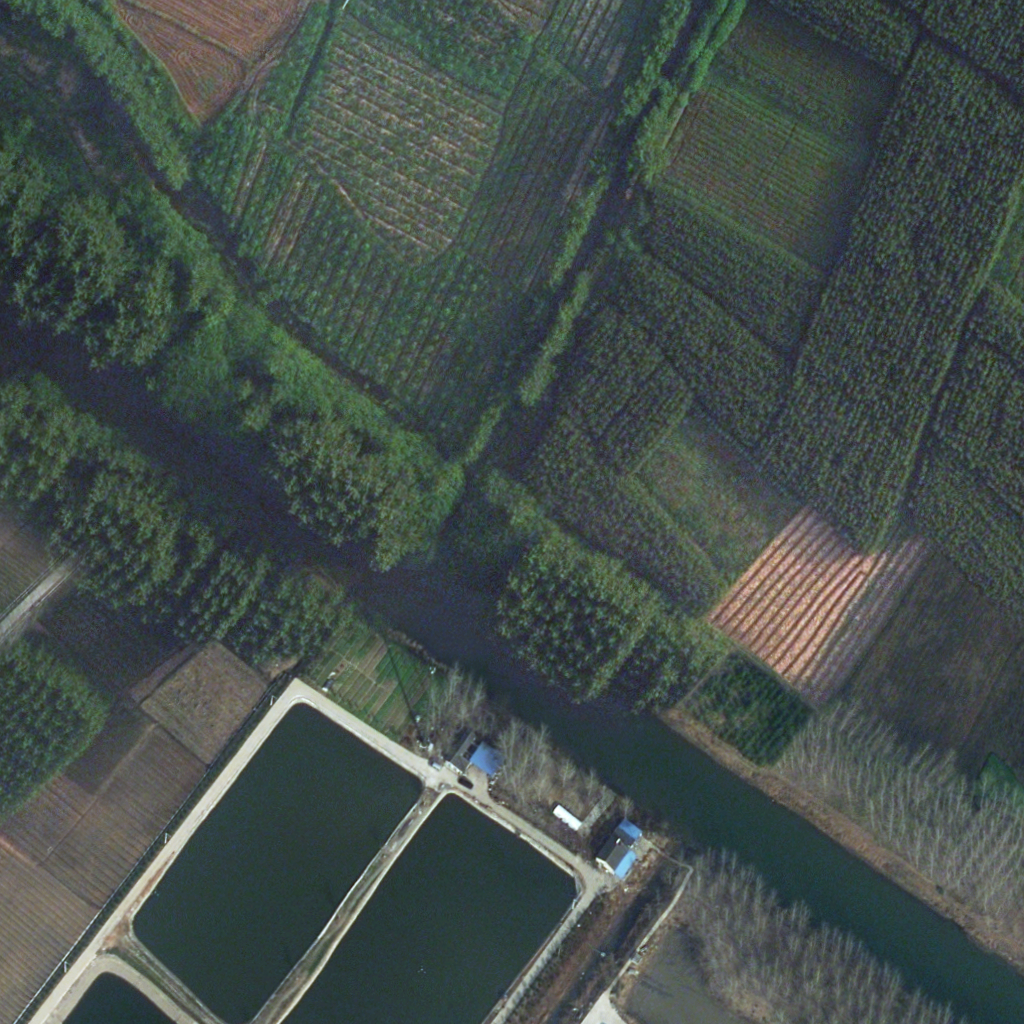

In [51]:
image = official_train[1]['image']
image

In [53]:
import numpy as np 

mask = official_train[1]['masks']
segmentation_map = np.array(mask)
segmentation_map

array([[4, 4, 4, ..., 7, 7, 7],
       [4, 4, 4, ..., 7, 7, 7],
       [4, 4, 4, ..., 7, 7, 7],
       ...,
       [7, 7, 7, ..., 4, 4, 4],
       [7, 7, 7, ..., 4, 4, 4],
       [7, 7, 7, ..., 4, 4, 4]], dtype=uint8)

In [54]:
np.unique(segmentation_map)

array([1, 2, 3, 4, 6, 7], dtype=uint8)

In [55]:
from huggingface_hub import hf_hub_download
import json

repo_id = f"chloechia/loveda"
filename = "id2label.json"
id2label = json.load(open(hf_hub_download(repo_id, filename, repo_type="dataset"), "r"))
id2label = {int(k):v for k,v in id2label.items()}
print(id2label)

{0: 'Ignore', 1: 'Background', 2: 'Building', 3: 'Road', 4: 'Water', 5: 'Barren', 6: 'Forest', 7: 'Agricultural'}


In [56]:
labels = [id2label[label] for label in np.unique(segmentation_map)]
print(labels)

['Background', 'Building', 'Road', 'Water', 'Forest', 'Agricultural']


In [57]:
def color_palette():
    """Color palette that maps each class to RGB values.
    
    This one is actually taken from ADE20k.
    """
    return [[255, 255, 255], [255,0,0], [255,255,0], [0,0,255], [159,129,183], [0,255,0], [255,195, 128]]

palette = color_palette()
palette

[[255, 255, 255],
 [255, 0, 0],
 [255, 255, 0],
 [0, 0, 255],
 [159, 129, 183],
 [0, 255, 0],
 [255, 195, 128]]

In [77]:
import numpy as np
from torch.utils.data import Dataset

class ImageSegmentationDataset(Dataset):
    """Image segmentation dataset."""

    def __init__(self, dataset, transform):
        """
        Args:
            dataset
        """
        self.dataset = dataset
        self.transform = transform
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        original_image = np.array(self.dataset[idx]['image'])
        original_segmentation_map = np.array(self.dataset[idx]['masks'])
        
        transformed = self.transform(image=original_image, mask=original_segmentation_map)
        image, segmentation_map = transformed['image'], transformed['masks']

        # convert to C, H, W
        image = image.transpose(2,0,1)

        return image, segmentation_map, original_image, original_segmentation_map

In [78]:
from torch.utils.data import Dataset 
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.RandomCrop((512, 512)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[123.675, 116.28, 103.53],
                          std=[58.395, 57.12, 57.375])
])

test_transform = transforms.Compose([
    transforms.Resize((512, 512)), 
    transforms.Normalize(mean=[123.675, 116.28, 103.53],
                          std=[58.395, 57.12, 57.375])
])

train_dataset = ImageSegmentationDataset(official_train, transform=train_transforms)
test_dataset = ImageSegmentationDataset(official_val, transform=test_transform)

In [68]:
image, segmentation_map, _, _ = train_dataset[0]
print(image.shape)
print(segmentation_map.shape)

KeyError: 'mask'

In [80]:
train_dataset[0]

TypeError: __call__() got an unexpected keyword argument 'image'

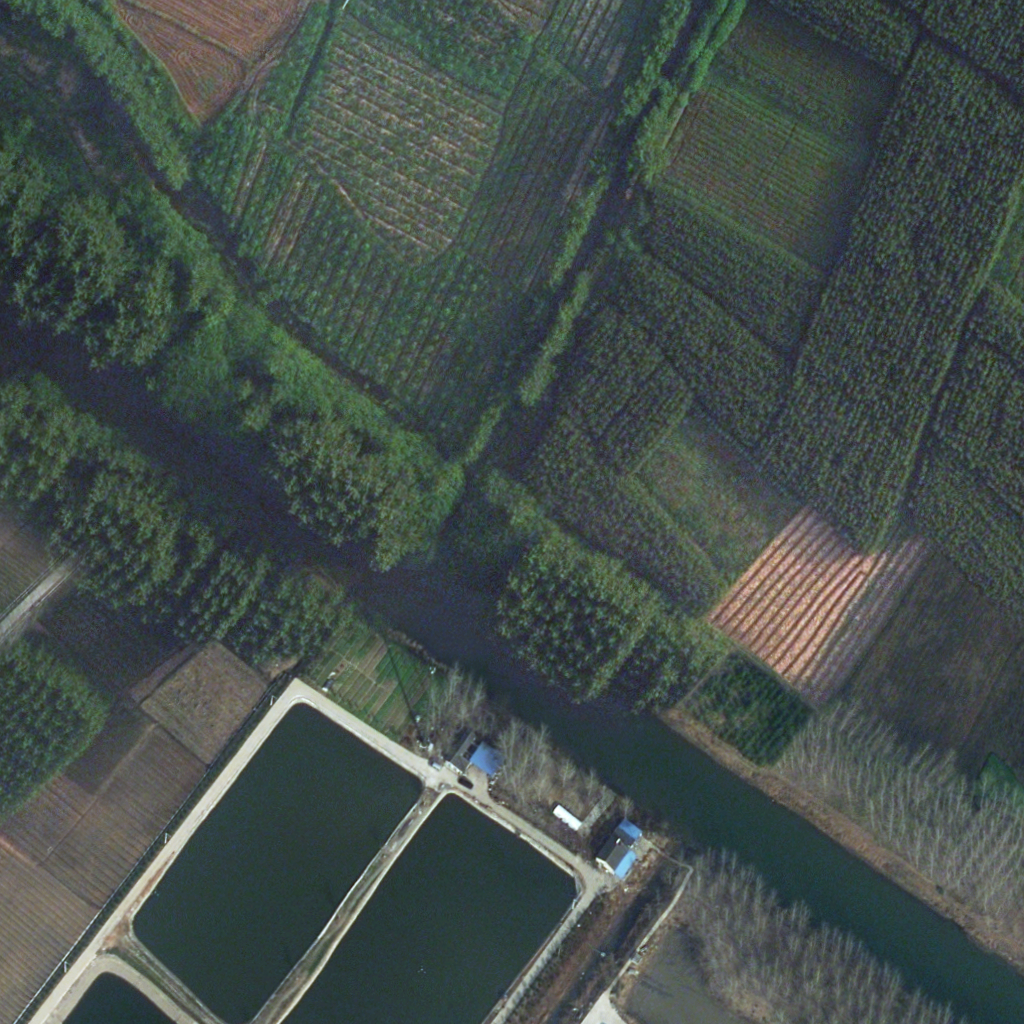

In [81]:
image

In [16]:
train = dataset["image"]
train

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 <PIL.PngI

# Finetuning

In [2]:
from transformers import AutoImageProcessor, Mask2FormerModel
processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-small-cityscapes-semantic")
model = Mask2FormerModel.from_pretrained("facebook/mask2former-swin-small-cityscapes-semantic", id2label=id2label, ignore_mismatched_sizes=True)




In [ ]:
outputs = model(batch["pixel_values"],
                class_labels=batch["class_labels"],
                mask_labels=batch["mask_labels"])

In [ ]:
outputs.loss


In [3]:
!pip install -q evaluate


In [4]:
import evaluate

metric = evaluate.load("mean_iou")